IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME02: les k-plus proches voisins (*k-NN*)

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

In [23]:
#Sahli oussama
#Nathan Brami

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-02</tt> et rajouter à la suite de <tt>tme-02</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient : <pre>tme-02-Skywalker-Solo</pre>

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-02-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Présentation ##

Dans ce TME, nous allons mettre en place une "architecture" de code nous permettant petit à petit de tester différents modèles d'apprentissage supervisé et programmer les k-NN. Nous allons nous restreindre au cas binaire où les données sont étiquetées $+1$ ou $-1$.


### Objectifs de ce TME 1

Le travail à réaliser est le suivant :
- apprendre à utiliser jupyter notebook
- se documenter sur les structures de données qui seront utilisées pour programmer tout au long du semestre
- implémenter des fonctions pour les mesures vues en cours 

In [24]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

**Remarque :** La concaténation de vecteurs s'obtient à l'aide de la fonction `vstack` de numpy.

In [25]:
# Exemple d'utilisation de vstack (pour plus de détails, chercher la documentation sur le web)

vecteur_1 = np.array([0, 1.5, 4.2])
vecteur_2 = np.array([1.1, 3.8, 20.01])

vecteur_3 = vecteur_1 + vecteur_2

v=np.vstack( (vecteur_1, vecteur_2, vecteur_3) )
print(v)

[[ 0.    1.5   4.2 ]
 [ 1.1   3.8  20.01]
 [ 1.1   5.3  24.21]]


### Représentation orientée objets


Pour implémenter nos algorithmes d'apprentissage et pour représenter les données, nous allons utiliser quelques éléments de programmation orientée objet (POO) qu'autorise le langage Python. 

Si vous ne connaissez rien à la POO, il est fortement conseillé de lire une documentation ou suivre un tutorial sur le web (par exemple, http://apprendre-python.com/page-apprendre-programmation-orientee-objet-poo-classes-python-cours-debutants).


## Étape 1: dataset

La première étape consiste à définir une classe, la classe LabelSet, pour stocker les données d'apprentissage, de validation et de test. Nous considérerons que les données tiennent en mémoire.

La classe LabelSet sert donc à stocker des couples $\{(x_1,y_1),...,(x_n,y_n)\}$. Les $x_i$ et $y_i$ seront des tableaux numpy.

**A noter : ** la méthode <tt>\_\_init\_\_</tt> est le constructeur de la classe.


In [26]:
class LabeledSet:  
    """ Classe pour représenter un ensemble d'exemples (base d'apprentissage)
        Variables d'instance :
            - input_dimension (int) : dimension de la description d'un exemple (x)
            - nb_examples (int) : nombre d'exemples dans l'ensemble
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        """ Ajout d'un exemple dans l'ensemble
            Argument: 
                - vector ()
                - label (int) : classe de l'exemple (+1 ou -1)
            
        """
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))  
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1   
    
    def getInputDimension(self):
        """ Renvoie la dimension de l'espace d'entrée
        """
        return self.input_dimension
    
    def size(self):
        """ Renvoie le nombre d'exemples dans l'ensemble
        """
        return self.nb_examples
    
    def getX(self, i):
        """ Renvoie la description du i-eme exemple (x_i)
        """
        return self.x[i]             
    
    #
    def getY(self, i):
        """ Renvoie la classe de du i-eme exemple (y_i)
        """
        return(self.y[i])

In [27]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +#1
#print(une_base.getX(0))
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +#1
#print(une_base.getX(1))
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1#
#print(une_base.getX(2))
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1
#print(une_base.getX(3))

S_pos = une_base.x[np.where(une_base.y == 1),:][0]
print(S_pos)
#print(une_base.x) # affiche tous les points sans leur classe
#print(une_base.x[np.where(une_base.y==1)])
#print(np.where(une_base.y==1))
#print(une_base)


[[0 1]
 [2 3]]


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>affiche_base</tt> qui, étant donné un LabelSet, permet d'afficher tous les exemples qu'il contient.

In [28]:
def affiche_base(objetLabelSet):
    #lse exemples de l'objet labeldset sont stocké dans sa variable x
    nb_exemples=objetLabelSet.size()
    for i in range(0,nb_exemples):
        ex_i=objetLabelSet.getX(i)
        print(ex_i,objetLabelSet.getY(i))
     





In [29]:
affiche_base(une_base)

[0 1] [1]
[2 3] [1]
[1 2] [-1]
[2 2] [-1]


Un dataset en 2 dimensions pourra être affiché en utilisant matplotlib et plus précisément la fonction `matplotlib.pyplot.scatter` permettant de dessiner un nuage de points - http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter -

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    #print(S_pos)
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1


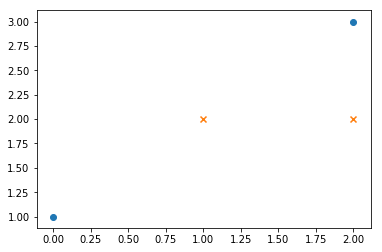

In [31]:
# Par exemple :len(data)
plot2DSet(une_base)

### Génération de données ''Jouet''

Nous allons pour l'instant nous intéresser à des datasets "jouet" générés selon des distributions choisies à la main. 

Commençons par un dataset en 2 dimensions (entrée) et 1 dimension (sortie): $x_i \in \mathbb{R}^2$, $y_i \in \{-1;+1\}$ tel que les données sont générées selon deux gaussiennes. Pour cela, nous utiliserons la fonction `numpy.random.multivariate_normal` - http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>createGaussianDataset</tt> qui, étant donné 5 arguments:
- `positive_center` est le centre de la gaussienne des points positifs (vecteur de taille 2)
- `positive_sigma` est la variance de la gaussienne des points positifs (sous forme de matrice 2*2)
- `negative_center` est le centre de la gaussienne des points négative (vecteur de taille 2)
- `negative_sigma` est la variance de la gaussienne des points négative (sous forme de matrice 2*2)
- `nb_points` est le nombre de points de chaque classe à générer

rend un dataset généré aléatoirement.

In [32]:
def createGaussianDataset(positive_center,positive_sigma,negative_center,negative_sigma,nb_points):
    #on doit générer 10 point négatif et 10 point positifs
    #on doit les générer autour de leur centre respectifs
    #retourne un ensemble de point associé à une moyenne et une covariance
    #+ la covariance est grande + lespace de valeurs est grand
    points_pos=np.random.multivariate_normal(positive_center, positive_sigma,nb_points) #jobtient un ensemble d'exemple positif de dim 2
    points_neg=np.random.multivariate_normal(negative_center,negative_sigma, nb_points)
    #est ce uq les points généré sont de dim 2?
    
    une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
    
    #j'ajoute les points positifs à ma base 
    for i in range(0,len(points_pos)):
        une_base.addExample(points_pos[i],1)   # ajout de l'exemple de classe +1
    
    #JAJOUTE LES POINTS NÉGAtifs
    for i in range(0,len(points_neg)):
        une_base.addExample(points_neg[i],-1)   # ajout de l'exemple de classe +1
        
    #je retourne mon objet LabeledSet qui m'a servit à stocker mes couples d'exemples 
    return une_base











Taille de la base jouet générée : 20 exemples


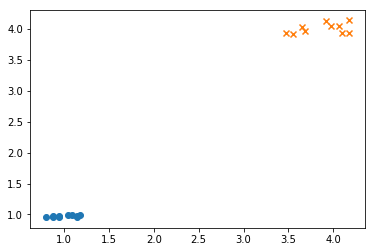

In [33]:
# Exemple d'utilisation:


#the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)
the_set = createGaussianDataset(np.array([1,1]),np.array([[0.01,0],[0,0.001]]),np.array([4,4]),np.array([[0.1,0],[0,0.01]]),10)
# remarque: 
"la variance est une mesure de la dispersion des valeurs d'un échantillion autour de la moyenne."
"Elle représente la moynne des carrés des écart à la moyenne."
"Si la variance est faible , alors les valeurs sont très centré autour de la moyenne"
"Si la variance est grande, les valeurs seront très espacés"
"L'écart type renseigne sur la dispersion des valeurs de la série par rapport à la moyenn."
"+ l'écart type est petit , + les valeurs sont regroupé autour de la moyenne , et inversement"

#Explication des veleur insérer dans la matrice 2*2
#"on a  une matrice 2*2 --> |variance_x ecart_type_x   |"
#                          "|ecart_type_y variance_y   |"


"Remarque importante --> dans la matrice 2*2 de covarince , on a 4 parametres : (variance de x(abcisse),ecart type associé au x,"
"variance de y(ordonne),ecart type associé à y)"
"Si on augmente la variance de x ,alors les point seront tres disperesé autour de la moyenne sur laxe des x"
"Si on augmente lecart type de x alors les points seront tres dispereser autour de la moyenne sur laxe des x "
"Si on augmente la variance de y alors les points seront tres dispereser autour de la moyenne sur laxe des y "
"Si on augmente lecart type de y alors les points seront tres dispereser autour de la moyenne sur laxe des y"
    
"chaque point est repréenté par deux cordonnées(x ,y), ainsi si on s'amuse à modifier les valeurs associé à variance_x"
"et à variance_y , on obtiendra le comportement décrit ci dessus"

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)


## Étape 2: les classifieurs

Un classifieur (binaire dans ce cours) permet, pour chaque point d'entrée donné, de calculer un score. Si le score est négatif, la donnée est associée à la classe $-1$, sinon à la classe $+1$. 

Les classifieurs que l'on va implémenter seront définis à l'aide d'une classe qui va dériver de la classe Classifier suivante. Cette classe est une classe "abstraite", elle sera dérivée par héritage pour définir des classifieurs particuliers (knn, arbres de décision, etc.).

Par conséquent, pour l'instant les méthodes `train` et `predict` ne seront pas définies car elles dépendent du modèle que l'on choisira.

Par contre, la fonction `computeAccuracy` renvoie le pourcentage de points bien classés. Elle peut être définie dès maintenant.

<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la fonction `computeAccuracy`.

In [34]:
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        raise NotImplementedError("Please Implement this method")

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        
        raise NotImplementedError("Please Implement this method")
    
    def accuracy(self, dataset):
        """ Permet de calculer la qualité du système 
        """
        #TODO !!!!
        #on a un ensemble d'exemple dans le dataset , chacun de ces exemples sont associié à des classes --> 
        #ce sont les résultats attendues
        #predict renvoie un score positif si cest positif , et négatif sinon
        # pedict va faire une prédiction sur la classe de chacun des exemples contenue dans le dataset
        #on fera une moyenne sur l'ensemble de ses prédiction qui ont étét juste
        #dataset = ensemble dexemple de dim 2
        #print(dataset.size())
        total=dataset.size() #nombre d'exemple evalués
        classe_ok=0 # si la prediction est correct sur la classe attendu , alors on incrémente de 1
        for i in range (0,dataset.size()):
            exemple_courant=dataset.getX(i)
            classe_de_exemple_courant=dataset.getY(i)
            score=self.predict(exemple_courant)
            #print("score et classe")
           # print(score,classe_de_exemple_courant)
            if(score>0):
                res=1
            else:
                res=-1
            #comparaison de la prédiction avec le résultat attendue 
            if(res==classe_de_exemple_courant):
                classe_ok=classe_ok+1
        
        return (classe_ok*100)/total # pourcentage de classe correct predit 
        
        
        
        

In [35]:
#test sur le dataset base
#je peux pas instancier un objet classifier car --> classe abstraite

#objetClassifier=Classifier(2)  # dimension des exemples =2
#res=objetClassifier.accuracy(une_base)
#print(res)
a = np.random.randint(-1,1,2)
print(a)
print(a[0])

[-1  0]
-1


Nous allons maintenant définir un **classifieur linéaire aléatoire** en étendant la classe Classifier et en implémentant le constructeur ainsi que les 2 méthodes `predict` et `train`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on doit générer aléatoirement un vecteur $w$ de taille `input_dimension` aléatoirement
- pour ce classifieur, la méthode `train` ne fait rien. On ne mettra qu'un print permettant d'afficher le message "Pas d'apprentissage pour ce classifieur"
- pour une description d'exemple $x$, la méthode `predict` doit utiliser la valeur de $\langle x | w\rangle$ pour prédire le label (+1 ou -1) associé


<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la classe ClassifierRandom qui hérite de la classe Classifier et permet de définir un classifieur linéaire aléatoire.

In [36]:
class ClassifierRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    #TODO: définir le constructeur, et les méthodes predict et train
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        #on souhaite que w a des coordonnées comprise entre 1 et 1 (rappel vecteur w --> 2cordonnees (x,y))
        self.w=np.random.randint(-1,1,2) #--> resultat accuracy : 50
        #self.w=np.random.rand(1,2)
        #print(self.w)
       
        
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        print("Pas d'apprentissage pour ce classifieur")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #on calcule le produit scalaire de w avec x(lexemple contenu dans le dataset)
        
        produit_scalaire=np.dot(self.w,x)
        return produit_scalaire

        
    

In [37]:
#"le role d'un classifieur est de classé dans des groupes des échantillons qui ont des propriété similaires,mesuré sur des observations."
#"Ici l'observations sur les échantillions du LabelSet peuvent portées sur la classe des points qui y sont compris."
#"Par exemple , on peut prendre plusieurs points , et selon leur positions , on aura établie un lien nous permettant de dire"
#"si un point est dans cette zone de l'espace , alors il est de classe ....(ici choisir entre 1 ou -1) --> A titre d'exemple"
#"Un classifieur linéaire est un type particulier de classifieur,il calcule la décision par combinaisons linéaires des échantillions"
#"La combinaison linaire entre plusieurs termes est la somme de ces termes où chacun sera associé à une constante"
#"Dans un classifieur linéaire , pour prendre une décision, on dénit un vecteur normal(ici w)."
#"Pour chaque point comprit dans l'objet LabelSet , on calcule le produit scalaire entre le vecteur normal et le point"
# w est le vecteur normal à la pente(la pente est la frontiere de decision qui passe par l'origine)
#la frontiere de decision sert à separer les points de classe 1 et les points de classe -1
#"On obtient la projection du point sur le vecteur normal , et le resultat obtenue fera référence à la valeur prise par la classe"
#un produit scalaire negatif --> fera référence à une classe -1
#un produit scalire positif fera référence à une classe +1


In [38]:
#La facon dont on a predit la classe de nos point:
#En gros , on a un graphique avec plusieurs point dedans 
#chacun de ces points est associé à une classe (-1 ou 1)
#on cherche à predire la classe de ces point

In [39]:
# Création d'un classifieur linéaire aléatoire de dimension 2:

un_classifieur = ClassifierRandom(2)

<font color="RED" size="+1">**[Q]**</font> Calculer la performance (*accuracy*) d'un classifieur linéaire aléatoire sur un ensemble de 100 points générés aléatoirement.

In [40]:

#génération de 100 point aléatoire de dimensions 2 car le classifieur est de dim 2

mon_dataset= LabeledSet(2)  # définition d'une base pour contenir des exemples en 2D
for i in range(0,50):
    mon_dataset.addExample(np.random.randint(1,3,2),1)   # ajout de l'exemple # je met que des point positif de classe 1

for i in range(0,50):
    mon_dataset.addExample(np.random.randint(4,6,2),-1)   # ajout de l'exemple # je met que des point positif de classe -1
#affiche_base(mon_dataset)
pourcentage_ok=un_classifieur.accuracy(mon_dataset)
#pourc=un_classifieur.accuracy(the_set)
print(pourcentage_ok)

#resulatat : 50 , quand la classe cest -1 il se trompe 


50.0


Voici une fonction qui permet de dessiner la frontière de decision d'un classifieur. La valeur `step` permet de choisir la précision du dessin.

In [41]:

# + step est grand et + plus la ligne tracé est droite
def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0) #l'exemple contenu dans le dataset quii contient les valeurs max
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])

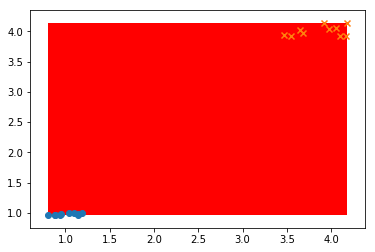

In [42]:
classifieur_random=ClassifierRandom(2)

plot_frontiere(the_set,classifieur_random)
plot2DSet(the_set)

## Étape 3 : k-NN

De la même façon que nous avons défini un classifieur aléatoire, nosu allons maintenant un classifieur par $k$ plus proches voisins (ou k-NN). 

Pour cela nous allons construire un tableau de distances que nous trierons grâce à la méthode `numpy.argsort`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on préciser, en plus de la dimension, le nombre de voisins à utiliser (valeur de $k$)
- dans la méthode `train`, on constitue la base de points de référence en mémorisant le LabeledSet donné
- pour une description d'exemple $x$, la méthode `predict` doit construire un tableau de distances aux points de référence, puis le trier grâce à la méthode `numpy.argsort`.


<font color="RED" size="+1">**[Q]**</font> Donner l'implémentation de la classe ClassifierKNN qui hérite de la classe Classifier et permet de définir un classifieur par k-NN.

In [43]:
import math
class ClassifierKNN(Classifier):
    #TODO
    def __init__(self, input_dimension,nb_voisins):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_voisins=nb_voisins
    
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        self.dataset=labeledSet  #base de point , on mémorise le LabeledSet constitué d'exemples
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
       #x est un exemple contenue dans le dataset
       # on doit prédire la classe associé à cet exemple (1 ou -1)
       # on a mémorisé le dataset dans une variable , en appelant la methode train
        # on calcule les k distances les plus petites qui le séparent de k voisins parmis lensemble des voisins
        #on récupere les classes associé à ces k voisins
        #on fait la moyenne entre ces k vakeur --> et on obtient la valeur de la classe prédit pour notre exemple courant
        
        # je cherhce donc k exemples
        #je calules tous les distances , je trie le tableau de distance obtenue , et je ne garde que les trois +petites
        #jassocie ces distance aux k voisins , et la je peux recup leur classe 
        #je fais un dictionnaire ou la distance et la classe associé à l'exemple seront stocké, ca m'évitera daller cherhcer les valeurs de ces classes
         
        #récuperer les cordonnées de x car x peut avoir plusieurs dimensiosn
        #ATTENTION:
        # pas besopin de faire un dico , car argsort renvoir les indice des plus petite valeurs
        #jai juste à calcuuler la liste des distances 
        coords_x=x #liste des coordonnées
        distances=[]
        #coords_p=[]
        for i in range(0,self.dataset.size()):       
            s=0 
            
            #je constitue la liste de coordonées du point courant
            #faire attention a ne pas faire une comparaison avec soi meme
            coords_p=self.dataset.getX(i)
            #print(coords_p,coords_x)
            #calcule la somme des coordonnées
            for j in range(0,len(coords_p)):
                #print(coords_x[i],coords_p[i])
                #print(s)
                s=s+((coords_x[j]-coords_p[j])**2)
                #print(s)
            s=math.sqrt(s)
            distances.append(s)
            
        # la j'ai toute mes distances
        index = np.argsort(distances) #indices des elements minum --> ordre croissant
        k_voisins=[] # je recup mes k voisins
        for i in range(0,self.nb_voisins):
            k_voisins.append(index[i])
            
        classes=[] # je recup les cllasses associés à ces distance 
        for i in range(0,len(k_voisins)):
            classes.append(self.dataset.getY(k_voisins[i]))
        
        somme_classes=0
        for i in range(0,len(classes)):
            somme_classes=somme_classes+classes[i]
           
        return somme_classes/len(somme_classes) # somme des classes associés au k + proche voisins/nbvoisins
            
        
        
        
        
        
        
    

In [44]:
T = np.array([16, 12, 18, 9])
index = np.argsort(T)
print(index)

[3 1 0 2]


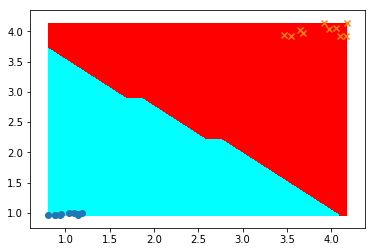

In [45]:
# Exemple d'utilisation :
knn = ClassifierKNN(2,1)
knn.train(the_set)


plot_frontiere(the_set,knn,20)
plot2DSet(the_set) 

## Étape 4: protocole expérimental

Attention, lorsque l'on évalue un classifieur, il est nécessaire de considérer deux ensembles distincts: un ensemble d'apprentissage et un ensemble de test. La performance doit être évaluée sur l'ensemble de test (et non pas sur l'ensemble d'apprentissage).

<font color="RED" size="+1">**[Q]**</font> Donner les instructions permettant d'évaluer un classifieur KNN et comparer les résultats obtenus avec ceux obtenus par un classifieur linéaire aléatoire sur le même jeu de données.

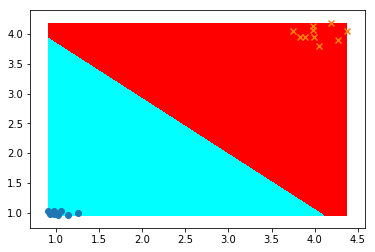

In [170]:
#instructions permettant d'évaluer un classifieur KNN 
mon_classifieur = ClassifierKNN(2,3)
mon_classifieur.train(the_set)
plot_frontiere(the_set,knn,20)
plot2DSet(the_set) 

##ceux obtenus par un classifieur linéaire aléatoire sur le même jeu de données
mon_classifieur_random=ClassifierRandom(2)

#plot_frontiere(the_set,mon_classifieur_random)
#plot2DSet(the_set)
 #On remarque que la frontiere établie par le clasiffieur Knn a tendance a resté la meme lors des différents tests, tandis
    #que , la frontière établie par le classifieur linéaire alétoire change lors des différents appels la fonction plot_frontiere



### Différentes expérimentations

<font color="RED" size="+1">**[Q]**</font> Comparer la performance (en train et test) de plusieurs classifieurs KNN avec différentes valeurs de k. Que pouvez vous constater ?
Idéalement, vous tracerez la performance (accuracy) en fonction de la valeur de k.
Essayez avec différentes configurations de gaussiennes.

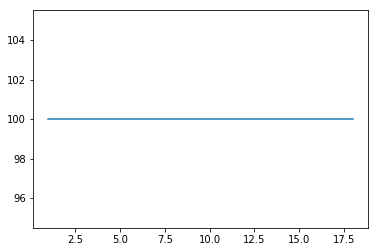

In [216]:
performances={}
#on crée un dictionnaire --> cle:valeur  , k:perfommance obtenue par lafonction accuracy
for i in range(1,the_set.size()-1):
    mon_classifieur = ClassifierKNN(2,i)  # k varie de 1 à 50
    mon_classifieur.train(the_set)     #--> entrainement  (le fait d'entrainer cest de memoriser lensemble de point (apprentissage))
    performances[i]=mon_classifieur.accuracy(the_set)
    
#print(performances)
k=[]
perfs=[]
for key,value in performances.items():
    k.append(key)
    perfs.append(value)

#print(k)
#print(perfs)

plt.plot(k,perfs)
plt.show()

#cest bizarre que j'obtient toujours 100 , mais jai affiché les scores avec les classes dans la fonction currency , et ca correspondait


## Étape 5 : données réelles UCI

Plusieurs datasets sont téléchargeables depuis: http://mldata.org

Voir : https://scikit-learn.org/0.19/datasets/mldata.html

Voici la fonction permettant de les charger (en spécifiant leur nom). La fonction se charge de charger les données depuis le web.

In [213]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home='.')
    print(data.data.shape)
    unique=np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
            
loadFile('breast-cancer_scale')
#Les donnees sont dans data.data et data.target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu

<font color="RED" size="+1">**[Q]**</font> Écrire la fonction `split` permettant de découper un labeledSet données en 2: un ensemble d'apprentissage et un ensemble de test.

<font color="RED" size="+1">**[Q]**</font> Tester différents k-NN , pour différentes valeurs de $k$, et tracer la courbe de performance (accuracy) pour les données d'apprentissage et les données de test.